In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import firwin, freqz, lfilter, iirfilter, butter
import pywt

Para el ECG: Para esta experiencia usaremos:

*   FIR: Hamming y Blackman
*   IIR: Butterworth



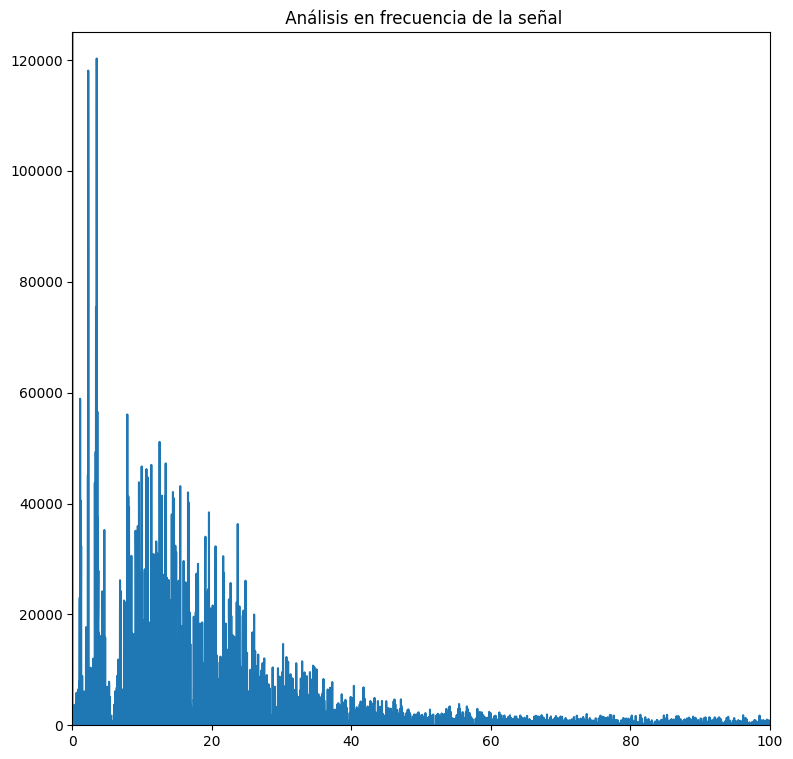

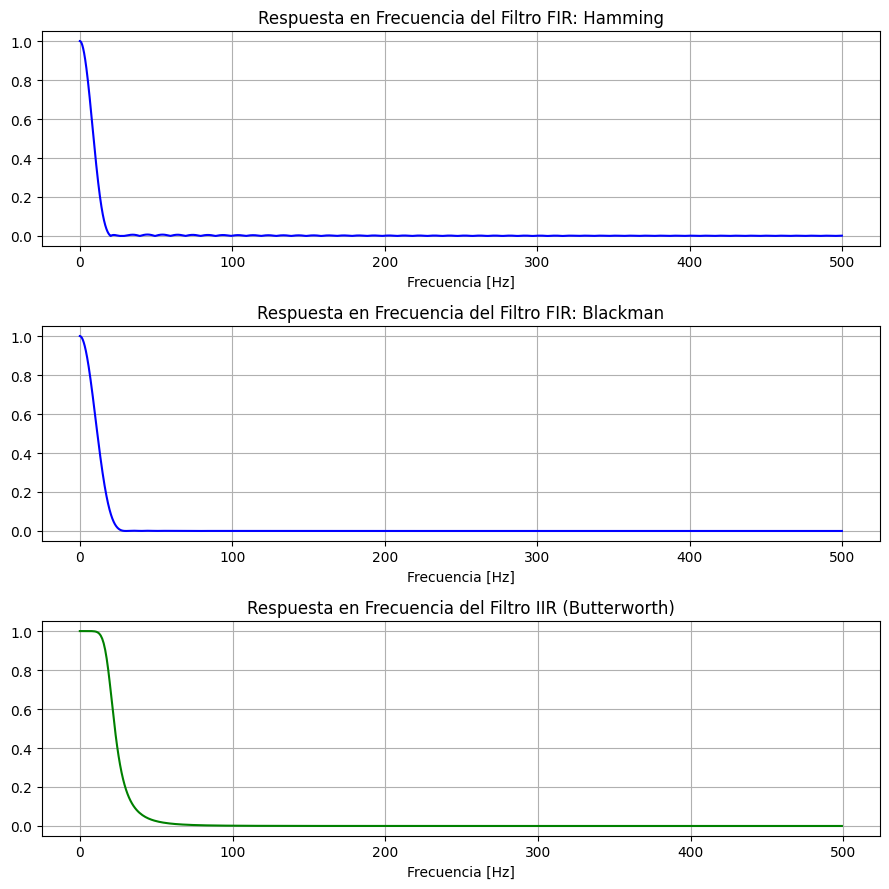

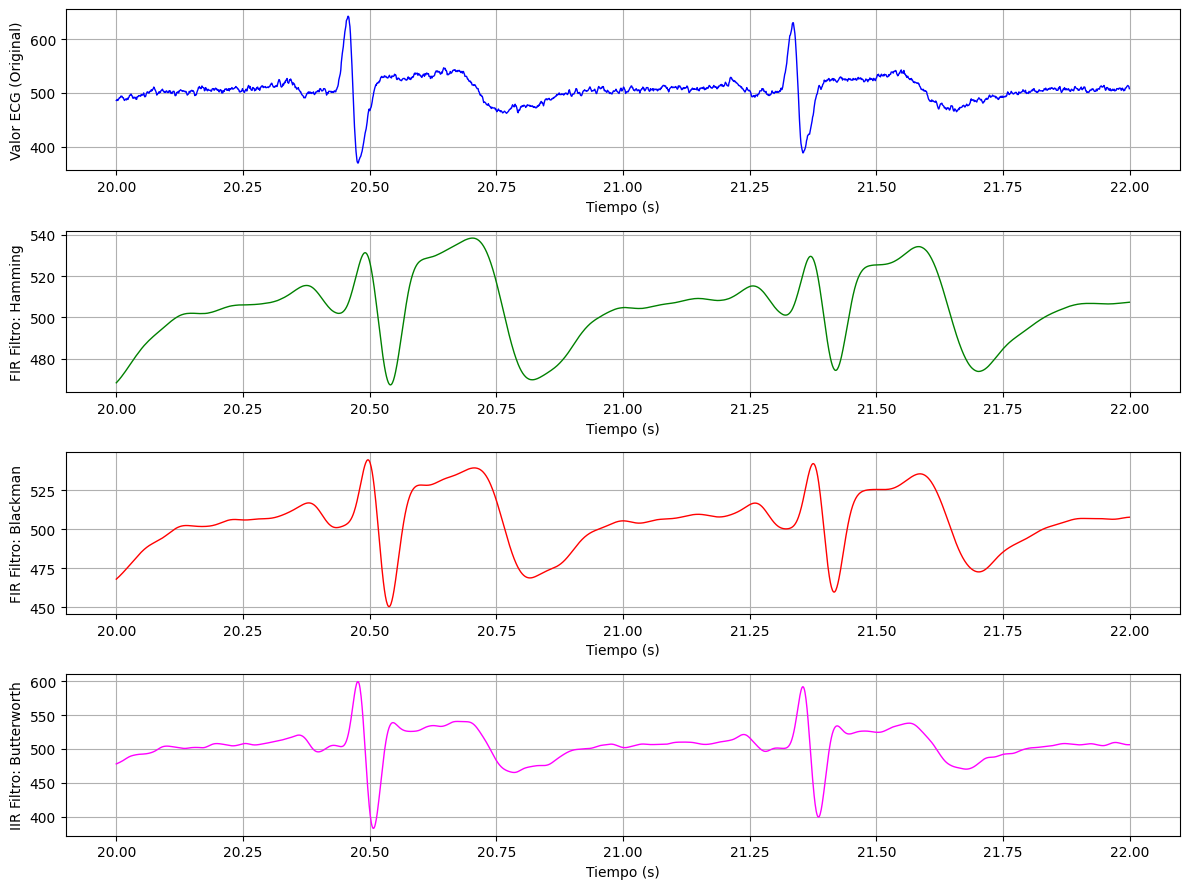

In [36]:
#ECG SUJETO EN REPOSO

# leyendo archivo texto
archivo_txt = "NormalBreath30s.txt"
datos_ecg = np.loadtxt(archivo_txt)
ecg = datos_ecg[:, 5]  # Sexta columna


# arreglo para los tiempos
frecuencia_muestreo = 1000 #Hz
tiempo = np.arange(len(ecg)) / frecuencia_muestreo

#Transformada de Fourier:
N = len(ecg);
n = np.arange(0,N)
fft_datos = np.fft.fft(ecg,N)
fft_datos = fft_datos[0:(N//2)]
fft_mag = np.abs(fft_datos)
fft_mag = np.round(fft_datos,3)

# Frecuencia de corte de los filtros
cutoff_frequency_fir = 0.04 #50 Hz
cutoff_frequency_iir = 0.04

# Diseño de filtros
num_taps = 101
fir_filter1 = firwin(num_taps, cutoff_frequency_fir, window='hamming', fs=frecuencia_muestreo)
fir_filter2 = firwin(num_taps, cutoff_frequency_fir, window='blackman', fs=frecuencia_muestreo)
iir_filter = iirfilter(N=4, Wn=cutoff_frequency_iir, btype='low', ftype='butter')
wavelet_filter = 'db4'

# Respuesta en frecuencia de la señal
frec = np.linspace(0, frecuencia_muestreo/2, N//2)
t = n/frecuencia_muestreo
plt.figure(figsize=(9, 9))
plt.plot(frec,fft_mag)
plt.xlim([0,100])
plt.ylim([0,0.125*1e6])
plt.title(" Análisis en frecuencia de la señal")


# Respuesta en frecuencia del filtro FIR: Hamming
w, h = freqz(fir_filter1, worN=8000)
plt.figure(figsize=(9, 9))
plt.subplot(3, 1, 1)
plt.plot(0.5*frecuencia_muestreo*w/np.pi, np.abs(h), 'b')
plt.title('Respuesta en Frecuencia del Filtro FIR: Hamming')
plt.xlabel('Frecuencia [Hz]')
plt.grid(True)


# Respuesta en frecuencia del filtro FIR: Rectangular
w, h = freqz(fir_filter2, worN=8000)
plt.subplot(3, 1, 2)
plt.plot(0.5*frecuencia_muestreo*w/np.pi, np.abs(h), 'b')
plt.title('Respuesta en Frecuencia del Filtro FIR: Blackman')
plt.xlabel('Frecuencia [Hz]')
plt.grid(True)

# Respuesta en frecuencia del filtro IIR (Butterworth)
w, h = freqz(*butter(4, cutoff_frequency_iir, btype='low'))
plt.subplot(3, 1, 3)
plt.plot(0.5*frecuencia_muestreo*w/np.pi, np.abs(h), 'g')
plt.title('Respuesta en Frecuencia del Filtro IIR (Butterworth)')
plt.xlabel('Frecuencia [Hz]')
plt.grid(True)
plt.tight_layout()
plt.show()

# Aplicar los filtros
ecg_fir1 = lfilter(fir_filter1, 1.0, ecg)
ecg_fir2 = lfilter(fir_filter2, 1.0, ecg)
ecg_iir = lfilter(iir_filter[0], iir_filter[1], ecg)

# Intervalo de tiempo que visualizamos
inicio_segundo = 20
fin_segundo = 22
inicio_muestra = int(inicio_segundo * frecuencia_muestreo)
fin_muestra = int(fin_segundo * frecuencia_muestreo)

# Gráficos de las señales filtradas
plt.figure(figsize=(12, 9))
plt.subplot(4, 1, 1)
plt.plot(tiempo[inicio_muestra:fin_muestra], ecg[inicio_muestra:fin_muestra], lw=1, color='blue')
plt.xlabel('Tiempo (s)')
plt.ylabel('Valor ECG (Original)')
plt.grid(True)

plt.subplot(4, 1, 2)
plt.plot(tiempo[inicio_muestra:fin_muestra], ecg_fir1[inicio_muestra:fin_muestra], lw=1, color='green')
plt.xlabel('Tiempo (s)')
plt.ylabel('FIR Filtro: Hamming')
plt.grid(True)

plt.subplot(4, 1, 3)
plt.plot(tiempo[inicio_muestra:fin_muestra], ecg_fir2[inicio_muestra:fin_muestra], lw=1, color='red')
plt.xlabel('Tiempo (s)')
plt.ylabel('FIR Filtro: Blackman')
plt.grid(True)

plt.subplot(4, 1, 4)
plt.plot(tiempo[inicio_muestra:fin_muestra], ecg_iir[inicio_muestra:fin_muestra], lw=1, color='magenta')
plt.xlabel('Tiempo (s)')
plt.ylabel('IIR Filtro: Butterworth')
plt.grid(True)

plt.tight_layout()
plt.show()

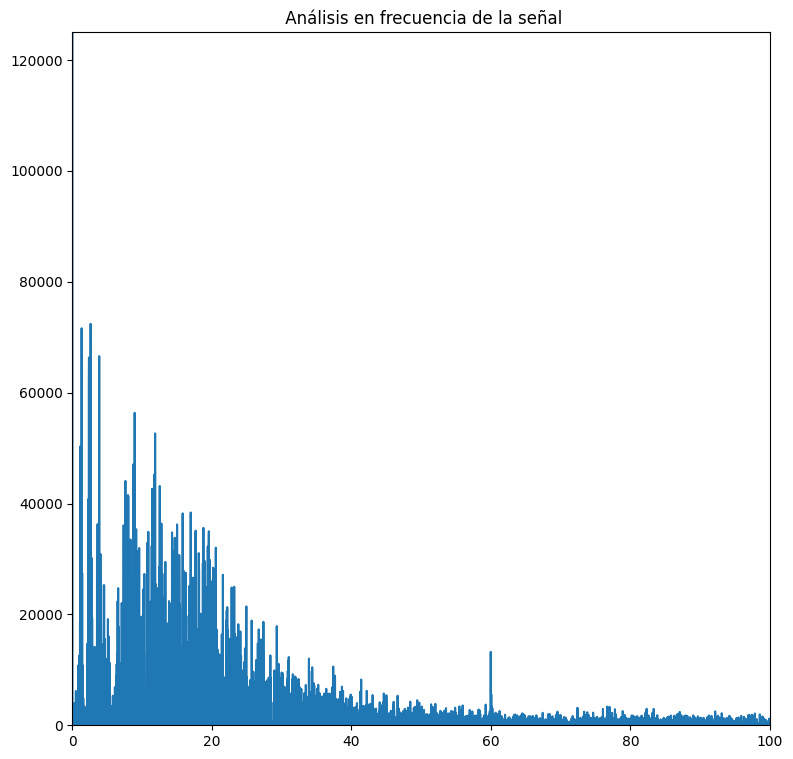

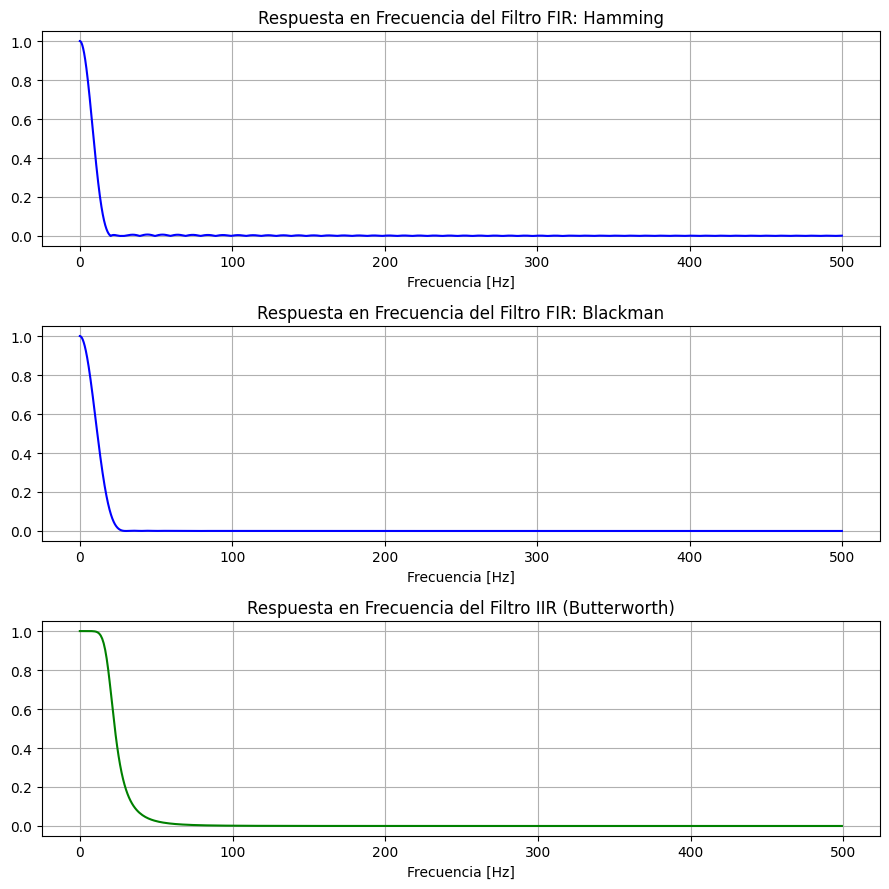

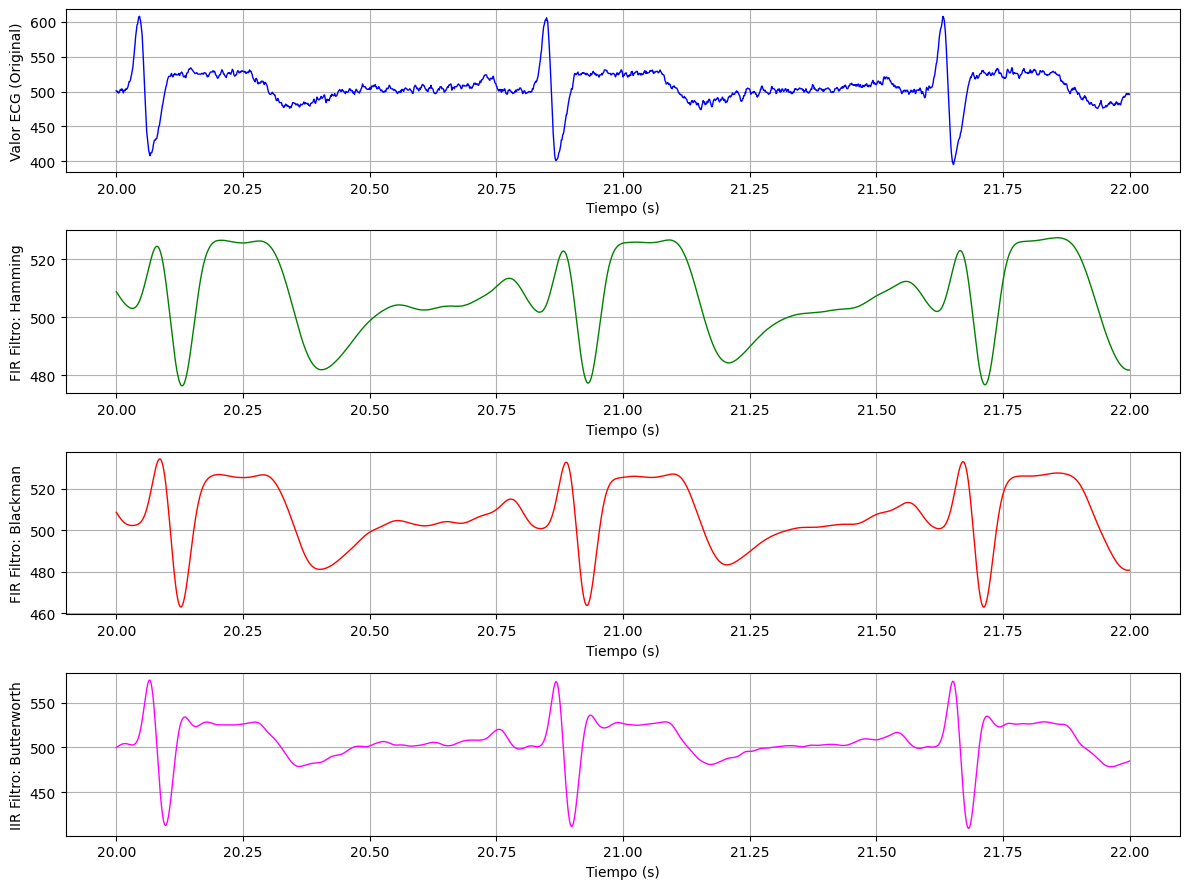

In [35]:
#ECG SUJETO INHALANFO/AGUNTANDO/EXHALANDO 5s CADA UNO_

# leyendo archivo texto
archivo_txt = "InHoldEx5s.txt"
datos_ecg = np.loadtxt(archivo_txt)
ecg = datos_ecg[:, 5]  # Sexta columna


# arreglo para los tiempos
frecuencia_muestreo = 1000 #Hz
tiempo = np.arange(len(ecg)) / frecuencia_muestreo

#Transformada de Fourier:
N = len(ecg);
n = np.arange(0,N)
fft_datos = np.fft.fft(ecg,N)
fft_datos = fft_datos[0:(N//2)]
fft_mag = np.abs(fft_datos)
fft_mag = np.round(fft_datos,3)

# Frecuencia de corte de los filtros
cutoff_frequency_fir = 0.04 #50 Hz
cutoff_frequency_iir = 0.04

# Diseño de filtros
num_taps = 101
fir_filter1 = firwin(num_taps, cutoff_frequency_fir, window='hamming', fs=frecuencia_muestreo)
fir_filter2 = firwin(num_taps, cutoff_frequency_fir, window='blackman', fs=frecuencia_muestreo)
iir_filter = iirfilter(N=4, Wn=cutoff_frequency_iir, btype='low', ftype='butter')
wavelet_filter = 'db4'

# Respuesta en frecuencia de la señal
frec = np.linspace(0, frecuencia_muestreo/2, N//2)
t = n/frecuencia_muestreo
plt.figure(figsize=(9, 9))
plt.plot(frec,fft_mag)
plt.xlim([0,100])
plt.ylim([0,0.125*1e6])
plt.title(" Análisis en frecuencia de la señal")


# Respuesta en frecuencia del filtro FIR: Hamming
w, h = freqz(fir_filter1, worN=8000)
plt.figure(figsize=(9, 9))
plt.subplot(3, 1, 1)
plt.plot(0.5*frecuencia_muestreo*w/np.pi, np.abs(h), 'b')
plt.title('Respuesta en Frecuencia del Filtro FIR: Hamming')
plt.xlabel('Frecuencia [Hz]')
plt.grid(True)


# Respuesta en frecuencia del filtro FIR: Rectangular
w, h = freqz(fir_filter2, worN=8000)
plt.subplot(3, 1, 2)
plt.plot(0.5*frecuencia_muestreo*w/np.pi, np.abs(h), 'b')
plt.title('Respuesta en Frecuencia del Filtro FIR: Blackman')
plt.xlabel('Frecuencia [Hz]')
plt.grid(True)

# Respuesta en frecuencia del filtro IIR (Butterworth)
w, h = freqz(*butter(4, cutoff_frequency_iir, btype='low'))
plt.subplot(3, 1, 3)
plt.plot(0.5*frecuencia_muestreo*w/np.pi, np.abs(h), 'g')
plt.title('Respuesta en Frecuencia del Filtro IIR (Butterworth)')
plt.xlabel('Frecuencia [Hz]')
plt.grid(True)
plt.tight_layout()
plt.show()

# Aplicar los filtros
ecg_fir1 = lfilter(fir_filter1, 1.0, ecg)
ecg_fir2 = lfilter(fir_filter2, 1.0, ecg)
ecg_iir = lfilter(iir_filter[0], iir_filter[1], ecg)

# Intervalo de tiempo que visualizamos
inicio_segundo = 20
fin_segundo = 22
inicio_muestra = int(inicio_segundo * frecuencia_muestreo)
fin_muestra = int(fin_segundo * frecuencia_muestreo)

# Gráficos de las señales filtradas
plt.figure(figsize=(12, 9))
plt.subplot(4, 1, 1)
plt.plot(tiempo[inicio_muestra:fin_muestra], ecg[inicio_muestra:fin_muestra], lw=1, color='blue')
plt.xlabel('Tiempo (s)')
plt.ylabel('Valor ECG (Original)')
plt.grid(True)

plt.subplot(4, 1, 2)
plt.plot(tiempo[inicio_muestra:fin_muestra], ecg_fir1[inicio_muestra:fin_muestra], lw=1, color='green')
plt.xlabel('Tiempo (s)')
plt.ylabel('FIR Filtro: Hamming')
plt.grid(True)

plt.subplot(4, 1, 3)
plt.plot(tiempo[inicio_muestra:fin_muestra], ecg_fir2[inicio_muestra:fin_muestra], lw=1, color='red')
plt.xlabel('Tiempo (s)')
plt.ylabel('FIR Filtro: Blackman')
plt.grid(True)

plt.subplot(4, 1, 4)
plt.plot(tiempo[inicio_muestra:fin_muestra], ecg_iir[inicio_muestra:fin_muestra], lw=1, color='magenta')
plt.xlabel('Tiempo (s)')
plt.ylabel('IIR Filtro: Butterworth')
plt.grid(True)

plt.tight_layout()
plt.show()

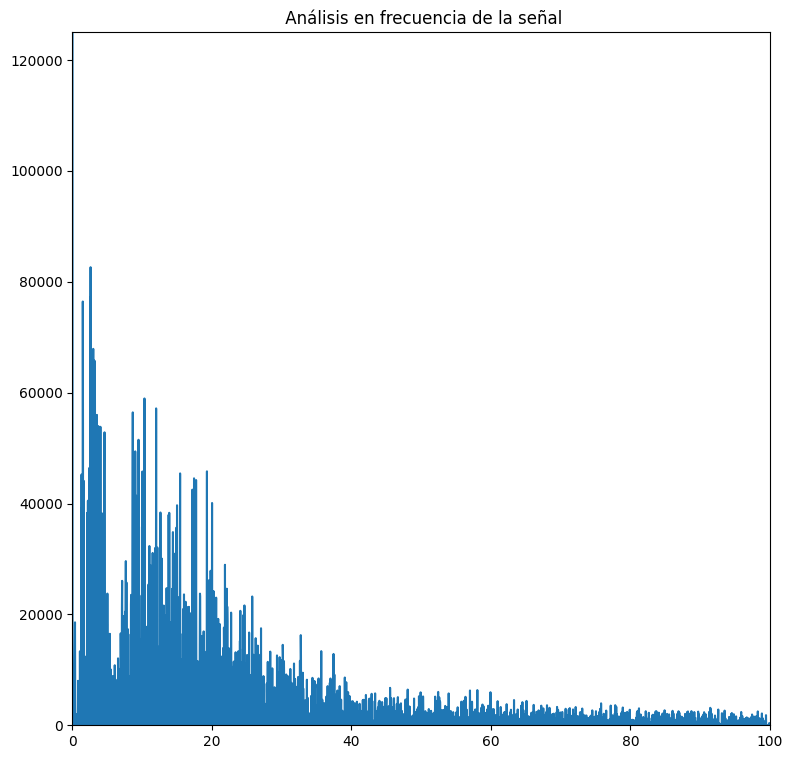

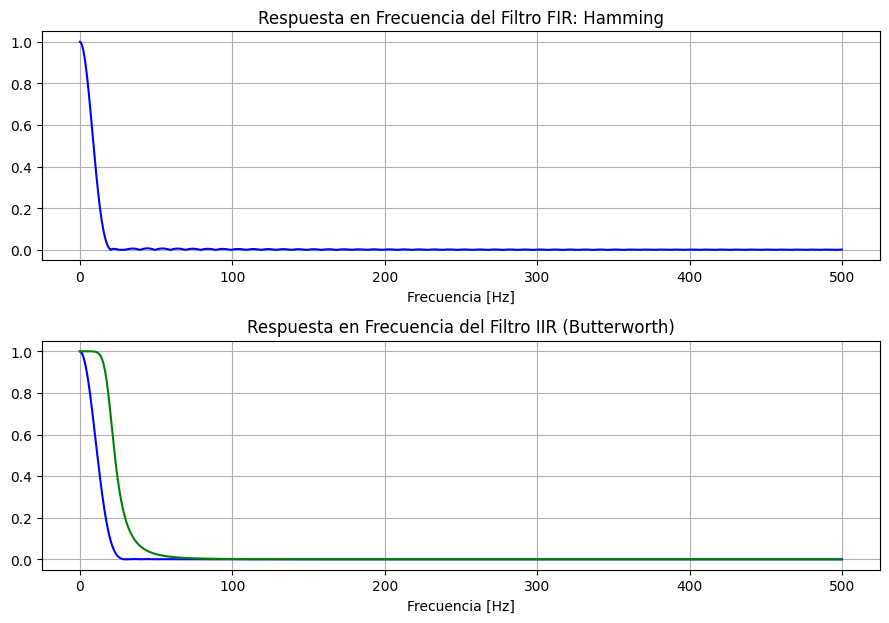

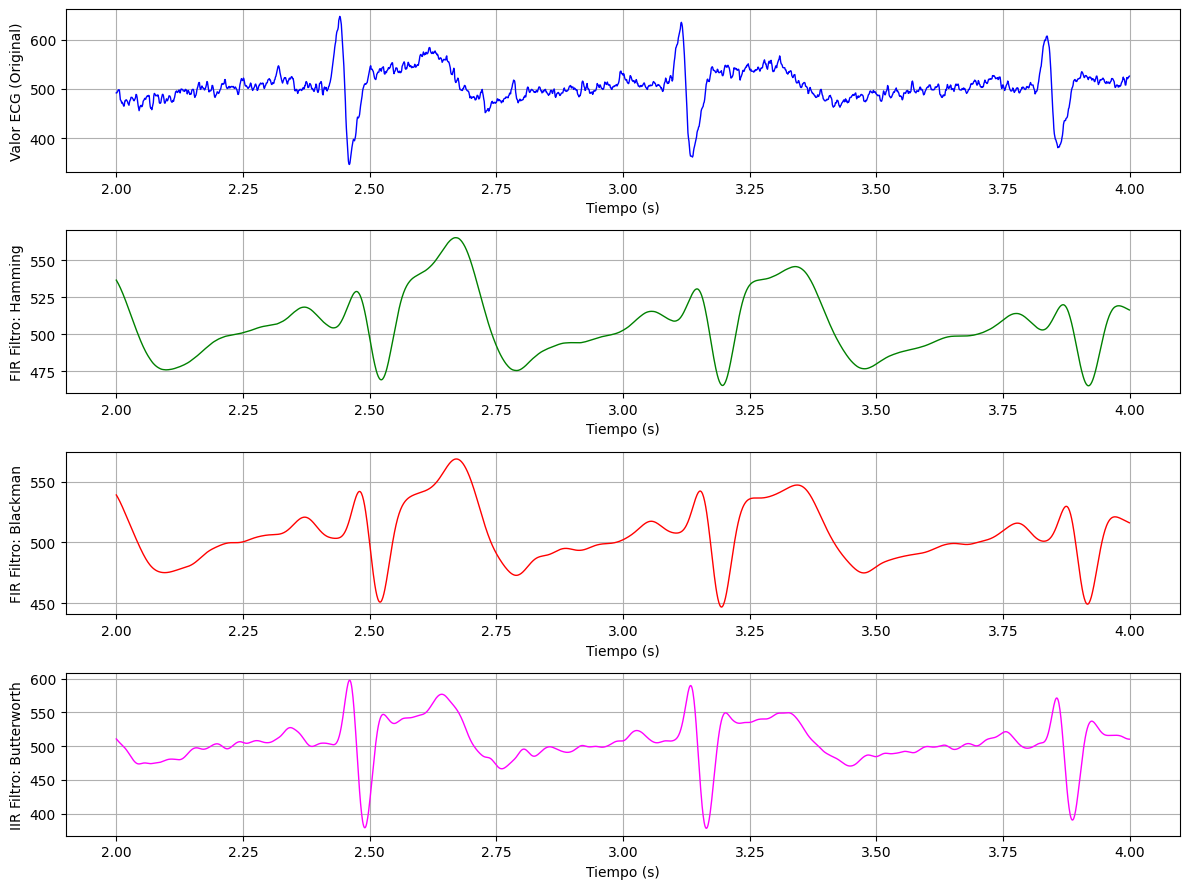

In [34]:
#ECG SUJETO DESPUÉS DE LOS BURPEES

# leyendo archivo texto
archivo_txt = "ReposandoBurpee30s.txt"
datos_ecg = np.loadtxt(archivo_txt)
ecg = datos_ecg[:, 5]  # Sexta columna


# arreglo para los tiempos
frecuencia_muestreo = 1000 #Hz
tiempo = np.arange(len(ecg)) / frecuencia_muestreo

#Transformada de Fourier:
N = len(ecg);
n = np.arange(0,N)
fft_datos = np.fft.fft(ecg,N)
fft_datos = fft_datos[0:(N//2)]
fft_mag = np.abs(fft_datos)
fft_mag = np.round(fft_datos,3)

# Frecuencia de corte de los filtros
cutoff_frequency_fir = 0.04 #50 Hz
cutoff_frequency_iir = 0.04

# Diseño de filtros
num_taps = 101
fir_filter1 = firwin(num_taps, cutoff_frequency_fir, window='hamming', fs=frecuencia_muestreo)
fir_filter2 = firwin(num_taps, cutoff_frequency_fir, window='blackman', fs=frecuencia_muestreo)
iir_filter = iirfilter(N=4, Wn=cutoff_frequency_iir, btype='low', ftype='butter')
wavelet_filter = 'db4'

# Respuesta en frecuencia de la señal
frec = np.linspace(0, frecuencia_muestreo/2, N//2)
t = n/frecuencia_muestreo
plt.figure(figsize=(9, 9))
plt.plot(frec,fft_mag)
plt.xlim([0,100])
plt.ylim([0,0.125*1e6])
plt.title(" Análisis en frecuencia de la señal")


# Respuesta en frecuencia del filtro FIR: Hamming
w, h = freqz(fir_filter1, worN=8000)
plt.figure(figsize=(9, 9))
plt.subplot(3, 1, 1)
plt.plot(0.5*frecuencia_muestreo*w/np.pi, np.abs(h), 'b')
plt.title('Respuesta en Frecuencia del Filtro FIR: Hamming')
plt.xlabel('Frecuencia [Hz]')
plt.grid(True)


# Respuesta en frecuencia del filtro FIR: Rectangular
w, h = freqz(fir_filter2, worN=8000)
plt.subplot(3, 1, 2)
plt.plot(0.5*frecuencia_muestreo*w/np.pi, np.abs(h), 'b')
plt.title('Respuesta en Frecuencia del Filtro FIR: Blackman')
plt.xlabel('Frecuencia [Hz]')
plt.grid(True)

# Respuesta en frecuencia del filtro IIR (Butterworth)
w, h = freqz(*butter(4, cutoff_frequency_iir, btype='low'))
plt.subplot(3, 1, 2)
plt.plot(0.5*frecuencia_muestreo*w/np.pi, np.abs(h), 'g')
plt.title('Respuesta en Frecuencia del Filtro IIR (Butterworth)')
plt.xlabel('Frecuencia [Hz]')
plt.grid(True)
plt.tight_layout()
plt.show()

# Aplicar los filtros
ecg_fir1 = lfilter(fir_filter1, 1.0, ecg)
ecg_fir2 = lfilter(fir_filter2, 1.0, ecg)
ecg_iir = lfilter(iir_filter[0], iir_filter[1], ecg)

# Intervalo de tiempo que visualizamos
inicio_segundo = 2
fin_segundo = 4
inicio_muestra = int(inicio_segundo * frecuencia_muestreo)
fin_muestra = int(fin_segundo * frecuencia_muestreo)

# Gráficos de las señales filtradas
plt.figure(figsize=(12, 9))
plt.subplot(4, 1, 1)
plt.plot(tiempo[inicio_muestra:fin_muestra], ecg[inicio_muestra:fin_muestra], lw=1, color='blue')
plt.xlabel('Tiempo (s)')
plt.ylabel('Valor ECG (Original)')
plt.grid(True)

plt.subplot(4, 1, 2)
plt.plot(tiempo[inicio_muestra:fin_muestra], ecg_fir1[inicio_muestra:fin_muestra], lw=1, color='green')
plt.xlabel('Tiempo (s)')
plt.ylabel('FIR Filtro: Hamming')
plt.grid(True)

plt.subplot(4, 1, 3)
plt.plot(tiempo[inicio_muestra:fin_muestra], ecg_fir2[inicio_muestra:fin_muestra], lw=1, color='red')
plt.xlabel('Tiempo (s)')
plt.ylabel('FIR Filtro: Blackman')
plt.grid(True)

plt.subplot(4, 1, 4)
plt.plot(tiempo[inicio_muestra:fin_muestra], ecg_iir[inicio_muestra:fin_muestra], lw=1, color='magenta')
plt.xlabel('Tiempo (s)')
plt.ylabel('IIR Filtro: Butterworth')
plt.grid(True)

plt.tight_layout()
plt.show()

Para el EEG: En esta experiencia utlizamos

*   FIR: Barlet
*   IIR: Butterworth



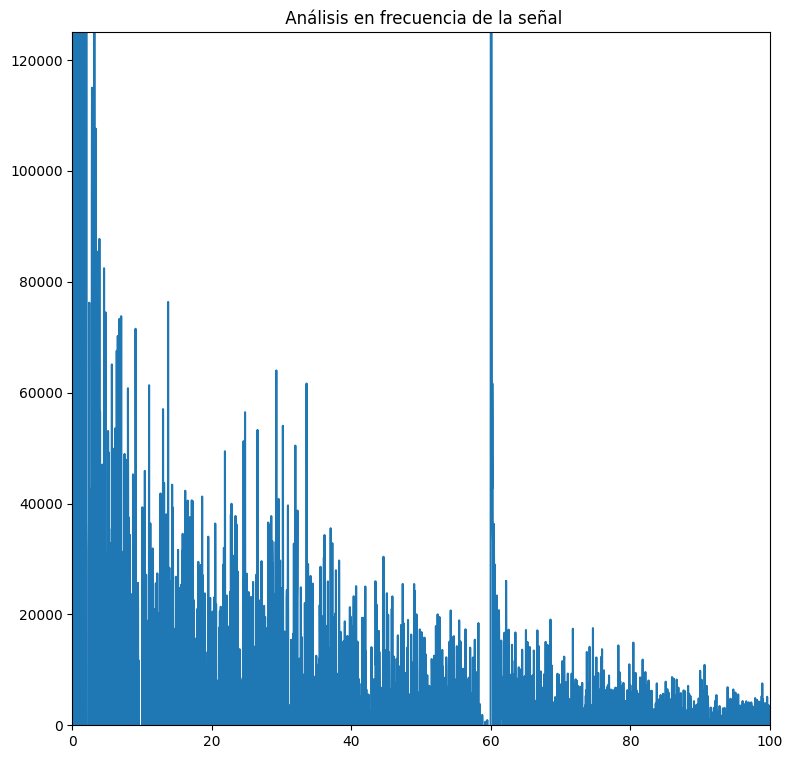

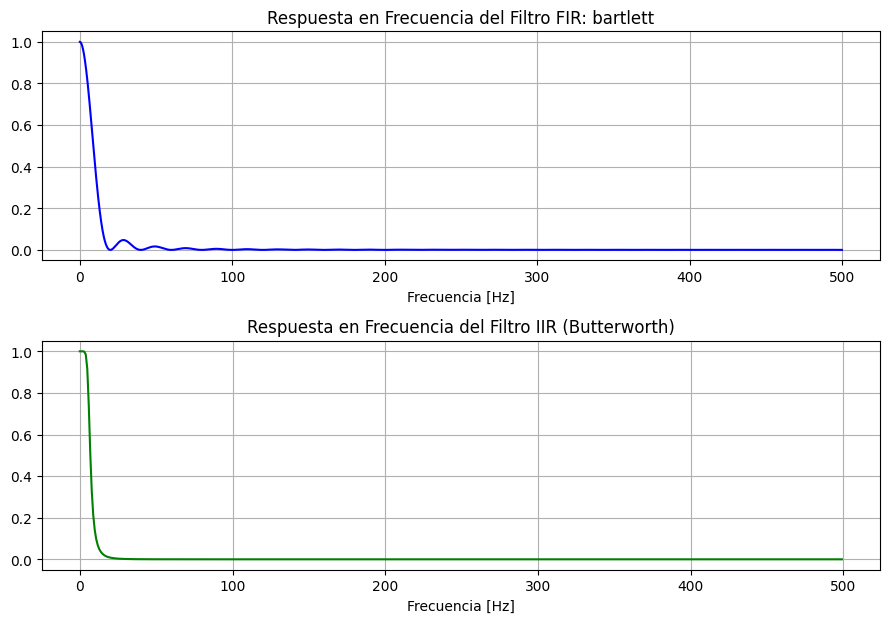

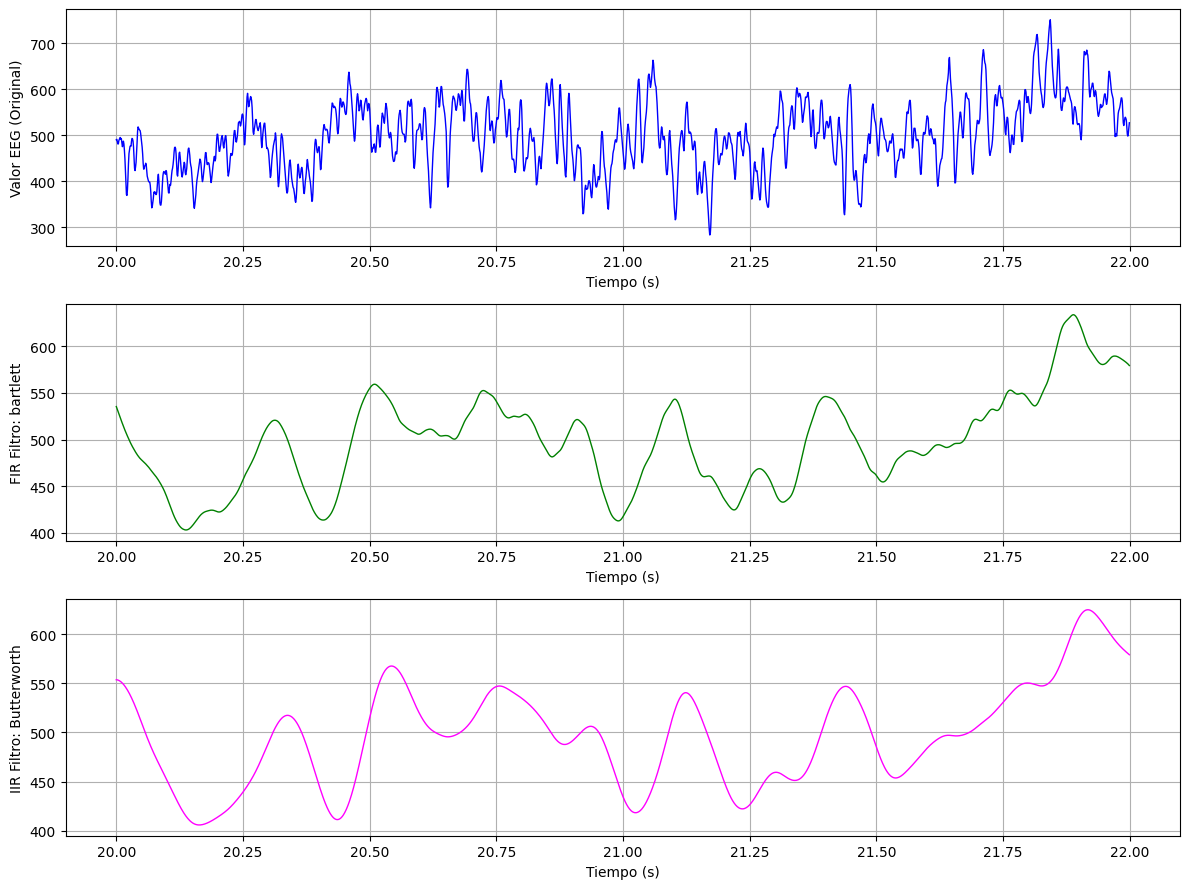

In [22]:
# EEG SUJETO EN REPOSO CON OJOS CERRADOS

archivo_txt = "EEG_PrimeroOsjoscerrados.txt"
datos_eeg = np.loadtxt(archivo_txt)
eeg = datos_eeg[:, 5]  # Sexta columna


frecuencia_muestreo = 1000
tiempo = np.arange(len(eeg)) / frecuencia_muestreo

#Transformada de Fourier:
N = len(eeg);
n = np.arange(0,N)
fft_datos = np.fft.fft(eeg,N)
fft_datos = fft_datos[0:(N//2)]
fft_mag = np.abs(fft_datos)
fft_mag = np.round(fft_datos,3)

cutoff_frequency_fir = 0.012
cutoff_frequency_iir = 0.012

num_taps = 101
fir_filter = firwin(num_taps, cutoff_frequency_fir, window='bartlett', fs=frecuencia_muestreo)
iir_filter = iirfilter(N=4, Wn=cutoff_frequency_iir, btype='low', ftype='butter')
wavelet_filter = 'db4'

# Respuesta en frecuencia de la señal
frec = np.linspace(0, frecuencia_muestreo/2, N//2)
t = n/frecuencia_muestreo
plt.figure(figsize=(9, 9))
plt.plot(frec,fft_mag)
plt.xlim([0,100])
plt.ylim([0,0.125*1e6])
plt.title(" Análisis en frecuencia de la señal")

w, h = freqz(fir_filter, worN=8000)
plt.figure(figsize=(9, 9))
plt.subplot(3, 1, 1)
plt.plot(0.5*frecuencia_muestreo*w/np.pi, np.abs(h), 'b')
plt.title('Respuesta en Frecuencia del Filtro FIR: bartlett')
plt.xlabel('Frecuencia [Hz]')
plt.grid(True)

w, h = freqz(*butter(4, cutoff_frequency_iir, btype='low'))
plt.subplot(3, 1, 2)
plt.plot(0.5*frecuencia_muestreo*w/np.pi, np.abs(h), 'g')
plt.title('Respuesta en Frecuencia del Filtro IIR (Butterworth)')
plt.xlabel('Frecuencia [Hz]')
plt.grid(True)
plt.tight_layout()

eeg_fir = lfilter(fir_filter, 1.0, eeg)
eeg_iir = lfilter(iir_filter[0], iir_filter[1], eeg)

inicio_segundo = 20
fin_segundo = 22
inicio_muestra = int(inicio_segundo * frecuencia_muestreo)
fin_muestra = int(fin_segundo * frecuencia_muestreo)

plt.figure(figsize=(12, 9))
plt.subplot(3, 1, 1)
plt.plot(tiempo[inicio_muestra:fin_muestra], eeg[inicio_muestra:fin_muestra], lw=1, color='blue')
plt.xlabel('Tiempo (s)')
plt.ylabel('Valor EEG (Original)')
plt.grid(True)

plt.subplot(3, 1, 2)
plt.plot(tiempo[inicio_muestra:fin_muestra], eeg_fir[inicio_muestra:fin_muestra], lw=1, color='green')
plt.xlabel('Tiempo (s)')
plt.ylabel('FIR Filtro: bartlett')
plt.grid(True)

plt.subplot(3, 1, 3)
plt.plot(tiempo[inicio_muestra:fin_muestra], eeg_iir[inicio_muestra:fin_muestra], lw=1, color='magenta')
plt.xlabel('Tiempo (s)')
plt.ylabel('IIR Filtro: Butterworth')
plt.grid(True)

plt.tight_layout()
plt.show()

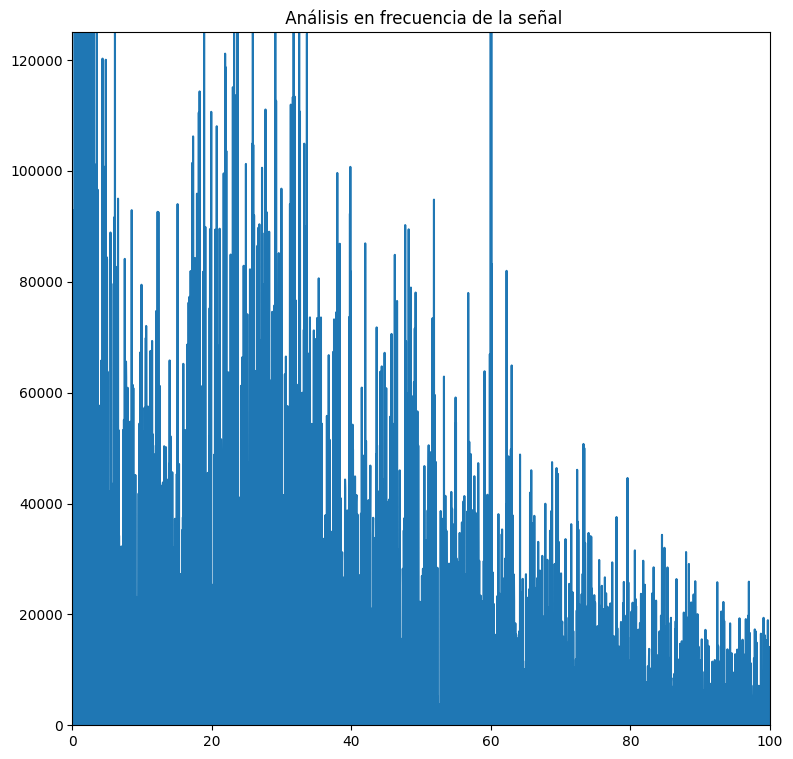

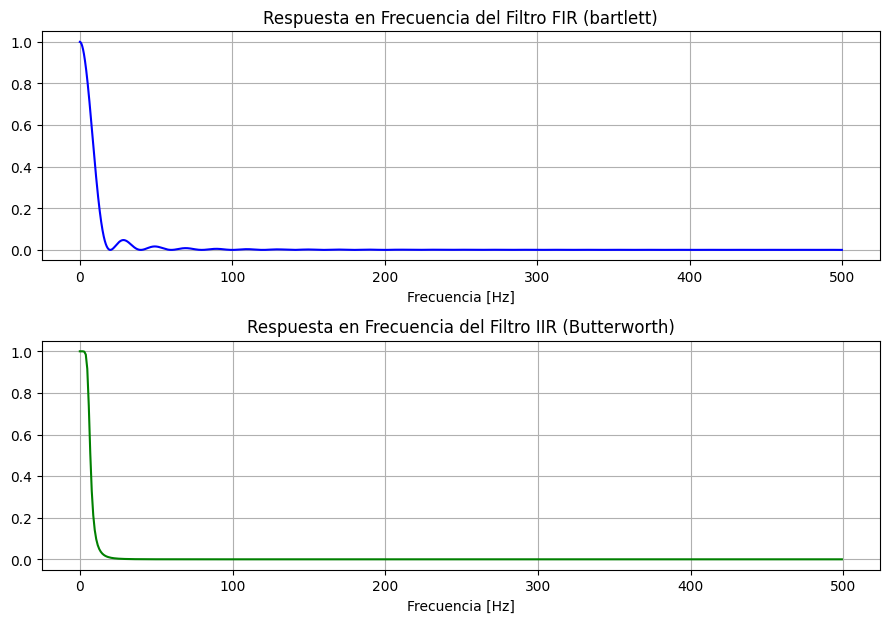

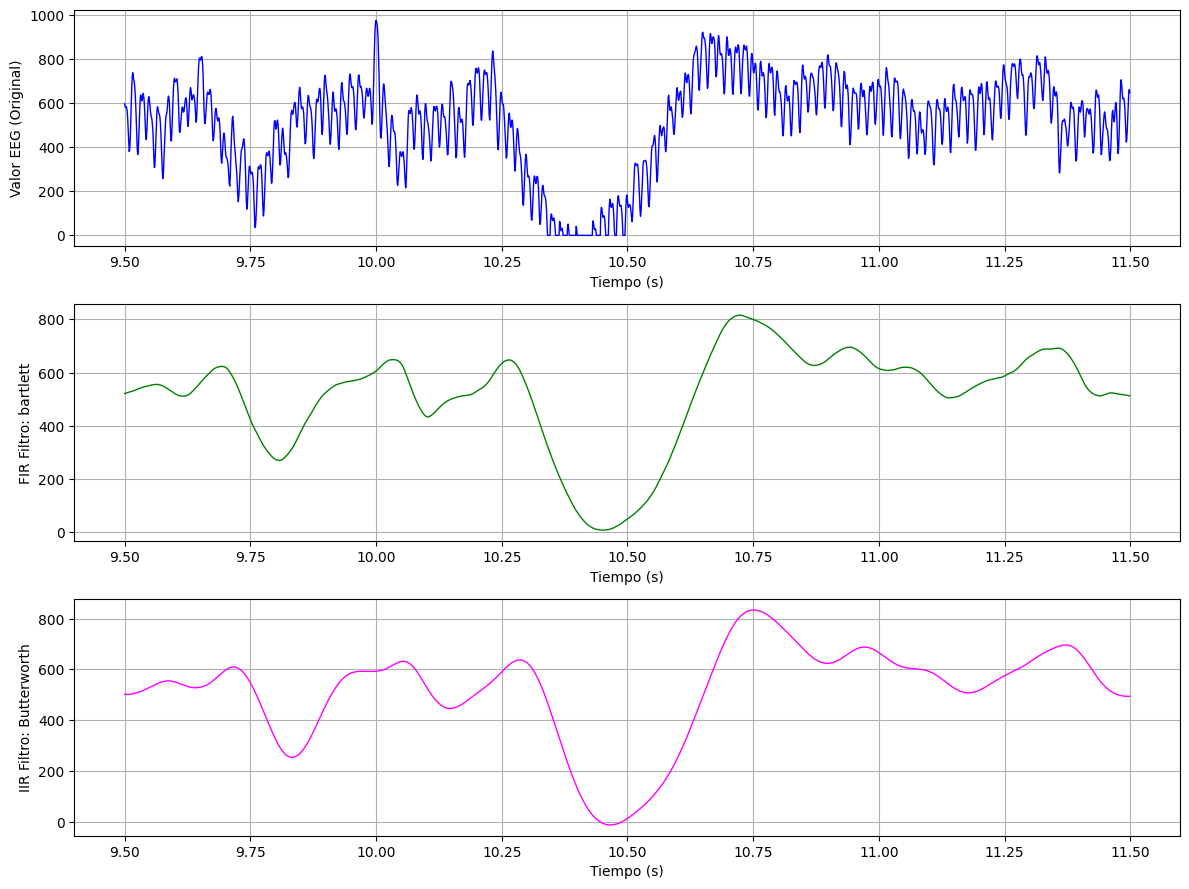

In [23]:
# EEG SUJETO ABRIENDO/CERRANDO LOS OJOS POR 5s C/U


archivo_txt = "EEG_2_5s.txt"
datos_eeg = np.loadtxt(archivo_txt)
eeg = datos_eeg[:, 5]  # Sexta columna

frecuencia_muestreo = 1000
tiempo = np.arange(len(eeg)) / frecuencia_muestreo

#Transformada de Fourier:
N = len(eeg);
n = np.arange(0,N)
fft_datos = np.fft.fft(eeg,N)
fft_datos = fft_datos[0:(N//2)]
fft_mag = np.abs(fft_datos)
fft_mag = np.round(fft_datos,3)

cutoff_frequency_fir = 0.012
cutoff_frequency_iir = 0.012

num_taps = 101
fir_filter = firwin(num_taps, cutoff_frequency_fir, window='bartlett', fs=frecuencia_muestreo)
iir_filter = iirfilter(N=4, Wn=cutoff_frequency_iir, btype='low', ftype='butter')

# Respuesta en frecuencia de la señal
frec = np.linspace(0, frecuencia_muestreo/2, N//2)
t = n/frecuencia_muestreo
plt.figure(figsize=(9, 9))
plt.plot(frec,fft_mag)
plt.xlim([0,100])
plt.ylim([0,0.125*1e6])
plt.title(" Análisis en frecuencia de la señal")

w, h = freqz(fir_filter, worN=8000)
plt.figure(figsize=(9, 9))
plt.subplot(3, 1, 1)
plt.plot(0.5*frecuencia_muestreo*w/np.pi, np.abs(h), 'b')
plt.title('Respuesta en Frecuencia del Filtro FIR (bartlett)')
plt.xlabel('Frecuencia [Hz]')
plt.grid(True)

w, h = freqz(*butter(4, cutoff_frequency_iir, btype='low'))
plt.subplot(3, 1, 2)
plt.plot(0.5*frecuencia_muestreo*w/np.pi, np.abs(h), 'g')
plt.title('Respuesta en Frecuencia del Filtro IIR (Butterworth)')
plt.xlabel('Frecuencia [Hz]')
plt.grid(True)
plt.tight_layout()
# El filtro Wavelet no es un filtro en el dominio de la frecuencia

# Aplicar los filtros
eeg_fir = lfilter(fir_filter, 1.0, eeg)
eeg_iir = lfilter(iir_filter[0], iir_filter[1], eeg)

# Define el intervalo de tiempo que deseas visualizar (segundos)
inicio_segundo = 9.5
fin_segundo = 11.5
inicio_muestra = int(inicio_segundo * frecuencia_muestreo)
fin_muestra = int(fin_segundo * frecuencia_muestreo)

# Crear gráficos de las señales filtradas
plt.figure(figsize=(12, 9))
plt.subplot(3, 1, 1)
plt.plot(tiempo[inicio_muestra:fin_muestra], eeg[inicio_muestra:fin_muestra], lw=1, color='blue')
plt.xlabel('Tiempo (s)')
plt.ylabel('Valor EEG (Original)')
plt.grid(True)

plt.subplot(3, 1, 2)
plt.plot(tiempo[inicio_muestra:fin_muestra], eeg_fir[inicio_muestra:fin_muestra], lw=1, color='green')
plt.xlabel('Tiempo (s)')
plt.ylabel('FIR Filtro: bartlett')
plt.grid(True)

plt.subplot(3, 1, 3)
plt.plot(tiempo[inicio_muestra:fin_muestra], eeg_iir[inicio_muestra:fin_muestra], lw=1, color='magenta')
plt.xlabel('Tiempo (s)')
plt.ylabel('IIR Filtro: Butterworth')
plt.grid(True)

plt.tight_layout()
plt.show()

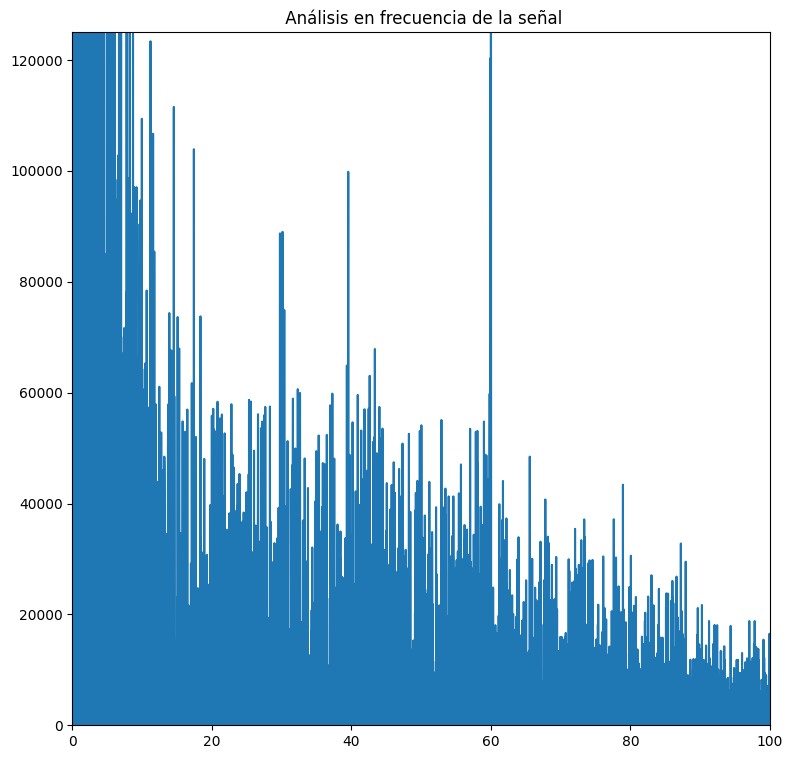

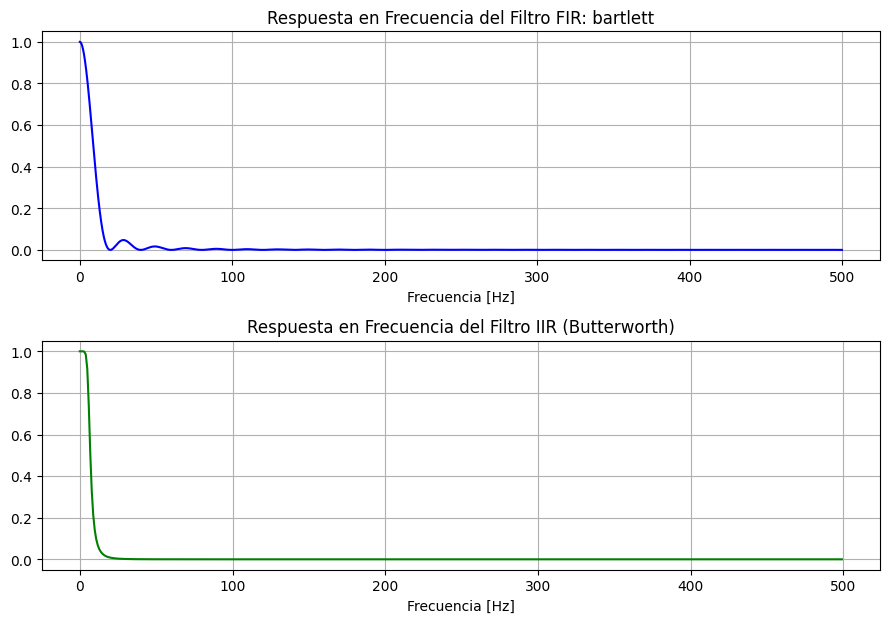

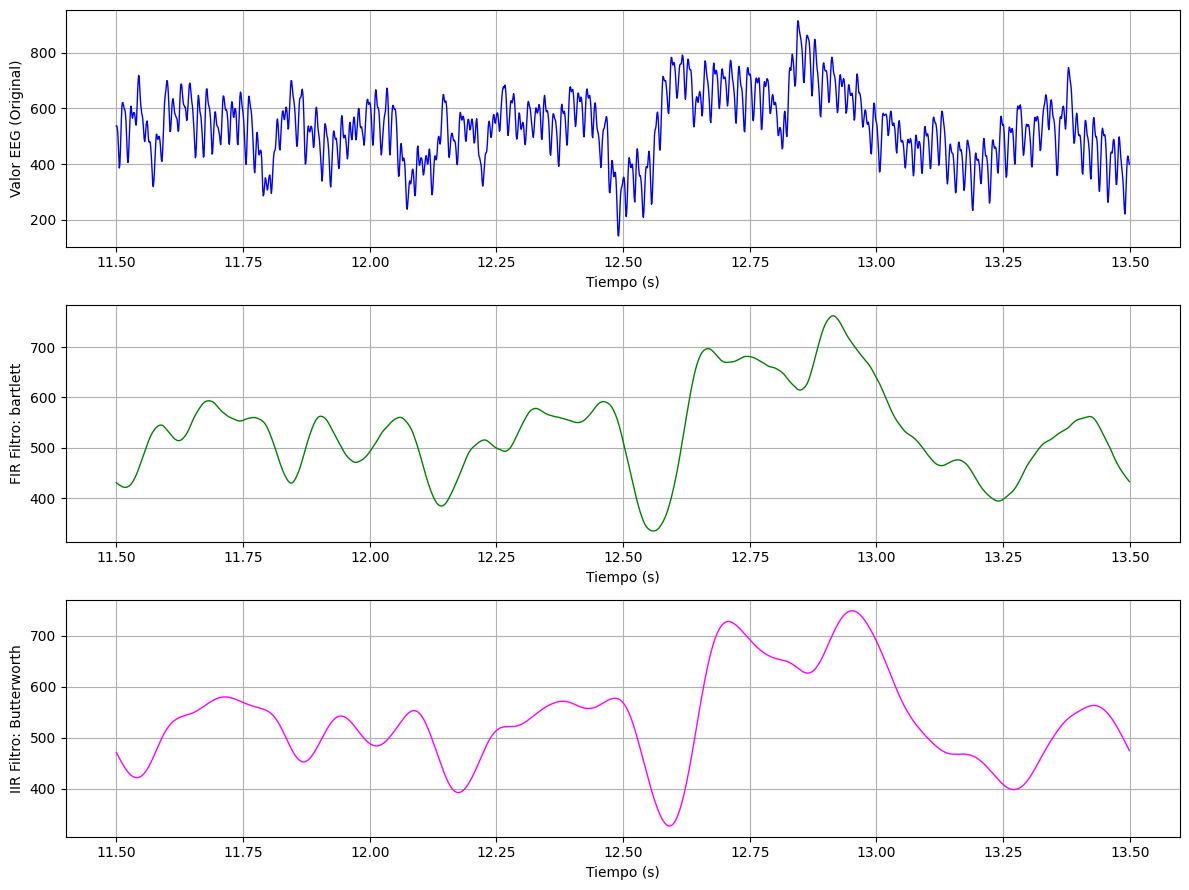

In [25]:
#EEG SUJETO HACIENDO EJERCICIOS DE MATE


# Cargar los datos desde el archivo TXT
archivo_txt = "ejmate.txt"
datos_eeg = np.loadtxt(archivo_txt)
eeg = datos_eeg[:, 5]  # Sexta columna

# Crear un arreglo de tiempo en segundos
frecuencia_muestreo = 1000
tiempo = np.arange(len(eeg)) / frecuencia_muestreo

#Transformada de Fourier:
N = len(eeg);
n = np.arange(0,N)
fft_datos = np.fft.fft(eeg,N)
fft_datos = fft_datos[0:(N//2)]
fft_mag = np.abs(fft_datos)
fft_mag = np.round(fft_datos,3)

# Frecuencia de corte de los filtros
cutoff_frequency_fir = 0.012
cutoff_frequency_iir = 0.012

# Diseñar filtros
num_taps = 101
fir_filter = firwin(num_taps, cutoff_frequency_fir, window='bartlett', fs=frecuencia_muestreo)
iir_filter = iirfilter(N=4, Wn=cutoff_frequency_iir, btype='low', ftype='butter')

# Respuesta en frecuencia de la señal
frec = np.linspace(0, frecuencia_muestreo/2, N//2)
t = n/frecuencia_muestreo
plt.figure(figsize=(9, 9))
plt.plot(frec,fft_mag)
plt.xlim([0,100])
plt.ylim([0,0.125*1e6])
plt.title(" Análisis en frecuencia de la señal")

# Respuesta en frecuencia del filtro FIR
w, h = freqz(fir_filter, worN=8000)
plt.figure(figsize=(9, 9))
plt.subplot(3, 1, 1)
plt.plot(0.5*frecuencia_muestreo*w/np.pi, np.abs(h), 'b')
plt.title('Respuesta en Frecuencia del Filtro FIR: bartlett')
plt.xlabel('Frecuencia [Hz]')
plt.grid(True)

# Respuesta en frecuencia del filtro IIR (Butterworth)
w, h = freqz(*butter(4, cutoff_frequency_iir, btype='low'))
plt.subplot(3, 1, 2)
plt.plot(0.5*frecuencia_muestreo*w/np.pi, np.abs(h), 'g')
plt.title('Respuesta en Frecuencia del Filtro IIR (Butterworth)')
plt.xlabel('Frecuencia [Hz]')
plt.grid(True)
plt.tight_layout()
# El filtro Wavelet no es un filtro en el dominio de la frecuencia

# Aplicar los filtros
eeg_fir = lfilter(fir_filter, 1.0, eeg)
eeg_iir = lfilter(iir_filter[0], iir_filter[1], eeg)

# Define el intervalo de tiempo que deseas visualizar (segundos)
inicio_segundo = 11.5
fin_segundo = 13.5
inicio_muestra = int(inicio_segundo * frecuencia_muestreo)
fin_muestra = int(fin_segundo * frecuencia_muestreo)

# Crear gráficos de las señales filtradas
plt.figure(figsize=(12, 9))
plt.subplot(3, 1, 1)
plt.plot(tiempo[inicio_muestra:fin_muestra], eeg[inicio_muestra:fin_muestra], lw=1, color='blue')
plt.xlabel('Tiempo (s)')
plt.ylabel('Valor EEG (Original)')
plt.grid(True)

plt.subplot(3, 1, 2)
plt.plot(tiempo[inicio_muestra:fin_muestra], eeg_fir[inicio_muestra:fin_muestra], lw=1, color='green')
plt.xlabel('Tiempo (s)')
plt.ylabel('FIR Filtro: bartlett')
plt.grid(True)

plt.subplot(3, 1, 3)
plt.plot(tiempo[inicio_muestra:fin_muestra], eeg_iir[inicio_muestra:fin_muestra], lw=1, color='magenta')
plt.xlabel('Tiempo (s)')
plt.ylabel('IIR Filtro: Butterworth')
plt.grid(True)

plt.tight_layout()
plt.show()

Para EMG:

*   FIR: Hamming
*   IIR: Butterworth





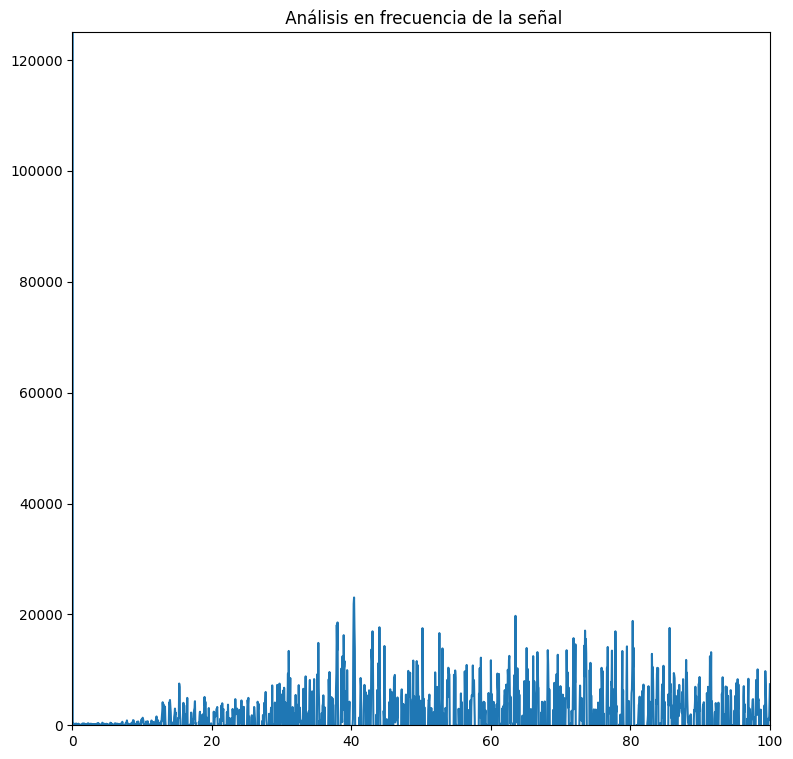

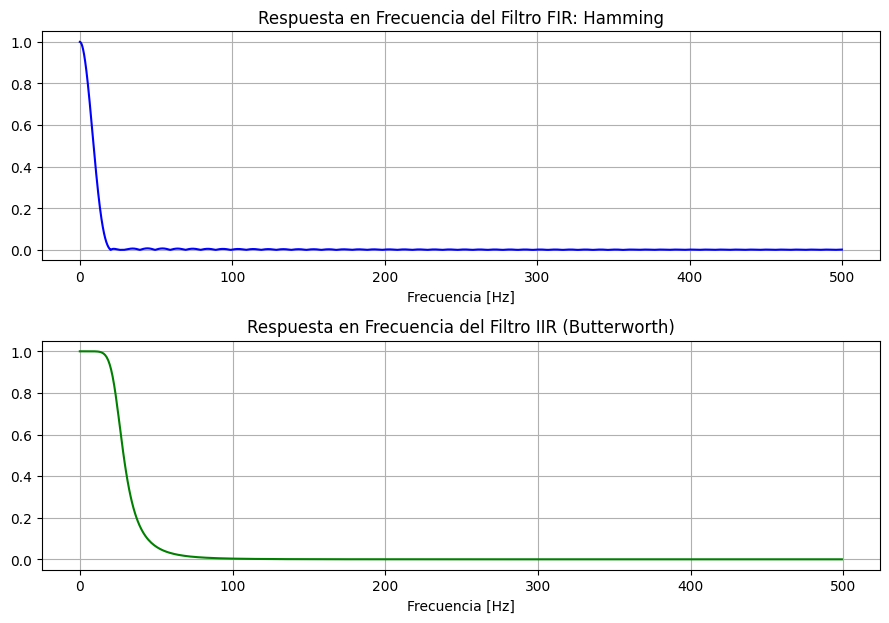

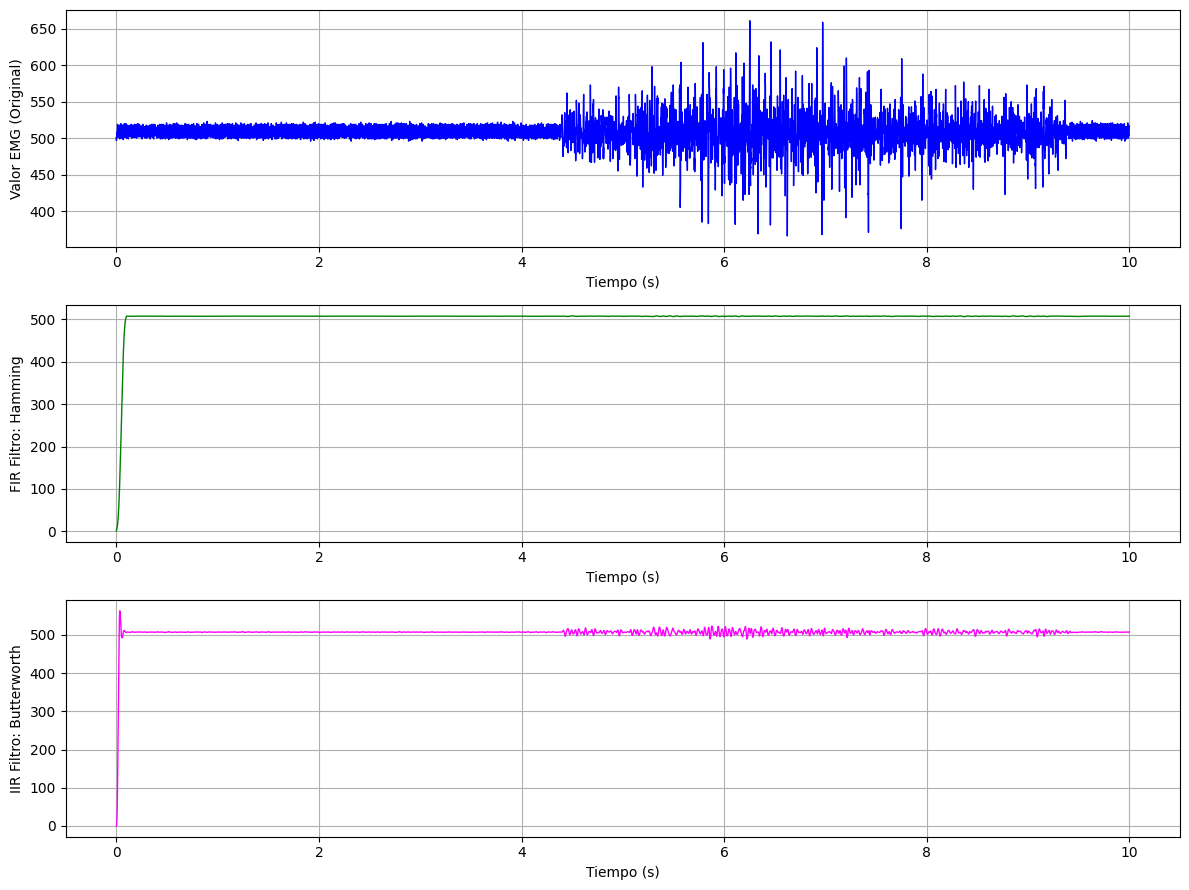

In [40]:
#EMG EN REPOSO

# Cargar los datos desde el archivo TXT
archivo_txt = "text_EMG.txt"
datos_emg = np.loadtxt(archivo_txt)
emg = datos_emg[:, 5]  # Sexta columna

#Transformada de Fourier:
N = len(emg);
n = np.arange(0,N)
fft_datos = np.fft.fft(emg,N)
fft_datos = fft_datos[0:(N//2)]
fft_mag = np.abs(fft_datos)
fft_mag = np.round(fft_datos,3)

# Crear un arreglo de tiempo en segundos
frecuencia_muestreo = 1000
tiempo = np.arange(len(emg)) / frecuencia_muestreo

# Frecuencia de corte de los filtros
cutoff_frequency_fir = 0.05
cutoff_frequency_iir = 0.05

# Diseñar filtros
num_taps = 101
fir_filter = firwin(num_taps, cutoff_frequency_fir, window='hamming', fs=frecuencia_muestreo)
iir_filter = iirfilter(N=4, Wn=cutoff_frequency_iir, btype='low', ftype='butter')

# Respuesta en frecuencia de la señal
frec = np.linspace(0, frecuencia_muestreo/2, N//2)
t = n/frecuencia_muestreo
plt.figure(figsize=(9, 9))
plt.plot(frec,fft_mag)
plt.xlim([0,100])
plt.ylim([0,0.125*1e6])
plt.title(" Análisis en frecuencia de la señal")

# Respuesta en frecuencia del filtro FIR
w, h = freqz(fir_filter, worN=8000)
plt.figure(figsize=(9, 9))
plt.subplot(3, 1, 1)
plt.plot(0.5*frecuencia_muestreo*w/np.pi, np.abs(h), 'b')
plt.title('Respuesta en Frecuencia del Filtro FIR: Hamming')
plt.xlabel('Frecuencia [Hz]')
plt.grid(True)

# Respuesta en frecuencia del filtro IIR (Butterworth)
w, h = freqz(*butter(4, cutoff_frequency_iir, btype='low'))
plt.subplot(3, 1, 2)
plt.plot(0.5*frecuencia_muestreo*w/np.pi, np.abs(h), 'g')
plt.title('Respuesta en Frecuencia del Filtro IIR (Butterworth)')
plt.xlabel('Frecuencia [Hz]')
plt.grid(True)
plt.tight_layout()
# El filtro Wavelet no es un filtro en el dominio de la frecuencia

# Aplicar los filtros
emg_fir = lfilter(fir_filter, 1.0, emg)
emg_iir = lfilter(iir_filter[0], iir_filter[1], emg)

# Define el intervalo de tiempo que deseas visualizar (segundos)
inicio_segundo = 0
fin_segundo = 10
inicio_muestra = int(inicio_segundo * frecuencia_muestreo)
fin_muestra = int(fin_segundo * frecuencia_muestreo)

# Crear gráficos de las señales filtradas
plt.figure(figsize=(12, 9))
plt.subplot(3, 1, 1)
plt.plot(tiempo[inicio_muestra:fin_muestra], emg[inicio_muestra:fin_muestra], lw=1, color='blue')
plt.xlabel('Tiempo (s)')
plt.ylabel('Valor EMG (Original)')
plt.grid(True)

plt.subplot(3, 1, 2)
plt.plot(tiempo[inicio_muestra:fin_muestra], emg_fir[inicio_muestra:fin_muestra], lw=1, color='green')
plt.xlabel('Tiempo (s)')
plt.ylabel('FIR Filtro: Hamming')
plt.grid(True)

plt.subplot(3, 1, 3)
plt.plot(tiempo[inicio_muestra:fin_muestra], emg_iir[inicio_muestra:fin_muestra], lw=1, color='magenta')
plt.xlabel('Tiempo (s)')
plt.ylabel('IIR Filtro: Butterworth')
plt.grid(True)

plt.tight_layout()
plt.show()

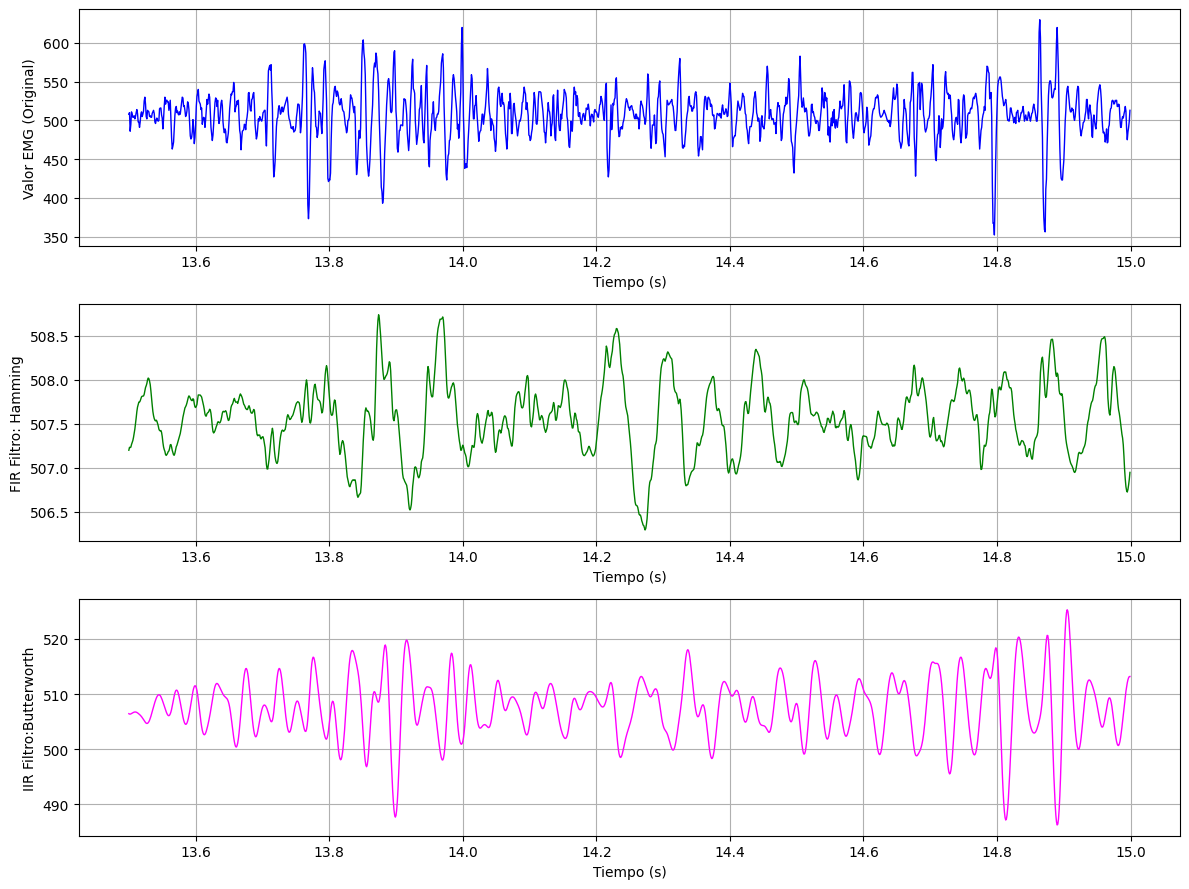

In [38]:
#EMG CONTRACCION LEVE

# Define el intervalo de tiempo que deseas visualizar (segundos)
inicio_segundo = 13.5
fin_segundo = 15
inicio_muestra = int(inicio_segundo * frecuencia_muestreo)
fin_muestra = int(fin_segundo * frecuencia_muestreo)

# Crear gráficos de las señales filtradas
plt.figure(figsize=(12, 9))
plt.subplot(3, 1, 1)
plt.plot(tiempo[inicio_muestra:fin_muestra], emg[inicio_muestra:fin_muestra], lw=1, color='blue')
plt.xlabel('Tiempo (s)')
plt.ylabel('Valor EMG (Original)')
plt.grid(True)

plt.subplot(3, 1, 2)
plt.plot(tiempo[inicio_muestra:fin_muestra], emg_fir[inicio_muestra:fin_muestra], lw=1, color='green')
plt.xlabel('Tiempo (s)')
plt.ylabel('FIR Filtro: Hamming')
plt.grid(True)

plt.subplot(3, 1, 3)
plt.plot(tiempo[inicio_muestra:fin_muestra], emg_iir[inicio_muestra:fin_muestra], lw=1, color='magenta')
plt.xlabel('Tiempo (s)')
plt.ylabel('IIR Filtro:Butterworth')
plt.grid(True)

plt.tight_layout()
plt.show()

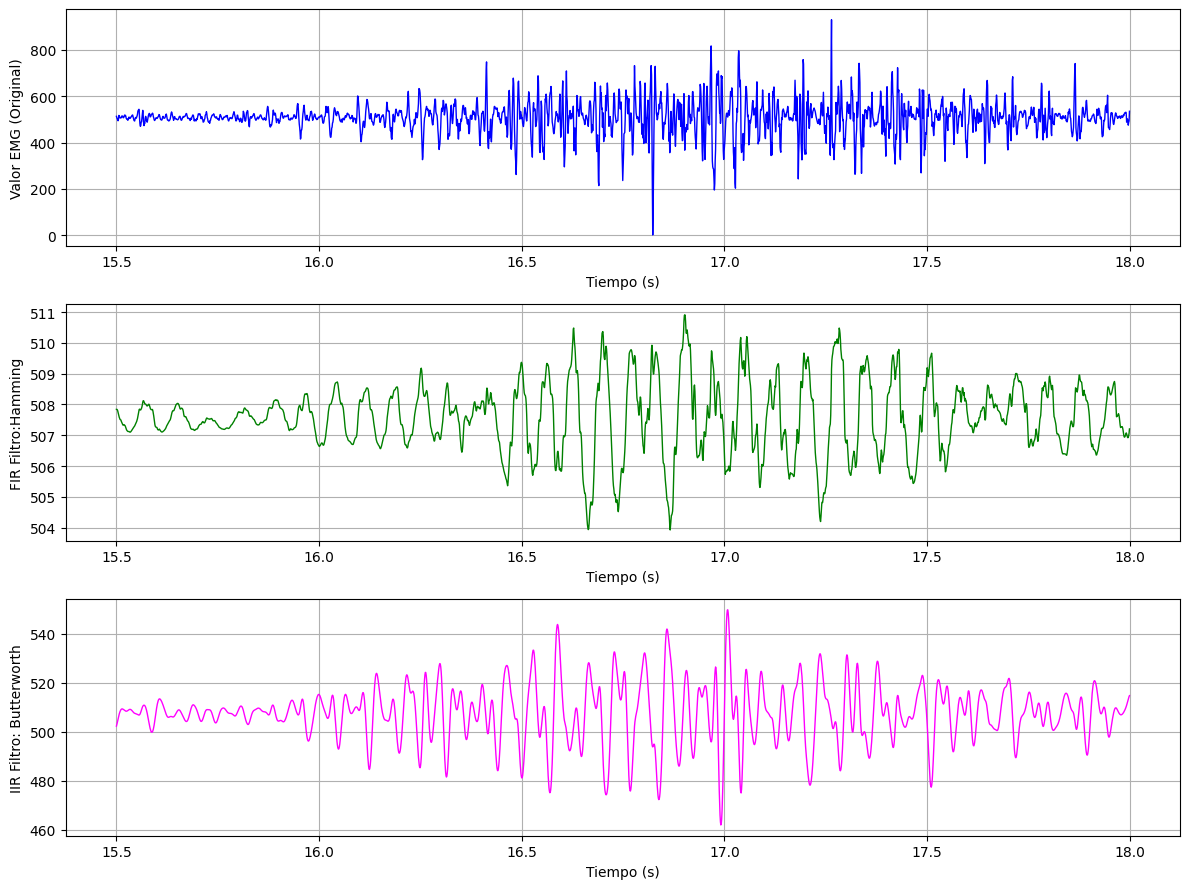

In [39]:
#EMG CONTRACCION FUERTE

# Define el intervalo de tiempo que deseas visualizar (segundos)
inicio_segundo = 15.5
fin_segundo = 18
inicio_muestra = int(inicio_segundo * frecuencia_muestreo)
fin_muestra = int(fin_segundo * frecuencia_muestreo)

# Crear gráficos de las señales filtradas
plt.figure(figsize=(12, 9))
plt.subplot(3, 1, 1)
plt.plot(tiempo[inicio_muestra:fin_muestra], emg[inicio_muestra:fin_muestra], lw=1, color='blue')
plt.xlabel('Tiempo (s)')
plt.ylabel('Valor EMG (Original)')
plt.grid(True)

plt.subplot(3, 1, 2)
plt.plot(tiempo[inicio_muestra:fin_muestra], emg_fir[inicio_muestra:fin_muestra], lw=1, color='green')
plt.xlabel('Tiempo (s)')
plt.ylabel('FIR Filtro:Hamming')
plt.grid(True)

plt.subplot(3, 1, 3)
plt.plot(tiempo[inicio_muestra:fin_muestra], emg_iir[inicio_muestra:fin_muestra], lw=1, color='magenta')
plt.xlabel('Tiempo (s)')
plt.ylabel('IIR Filtro: Butterworth')
plt.grid(True)

plt.tight_layout()
plt.show()